https://github.com/skkkystyle/mmadhwbonus

# Bonus Quest

**Difficulty:** A

**Description:** Students are in a tough spot after changing the grading formula for assignments and now fear taking the exam without a 3.5 GPA. The system gives players a chance to raise their score by completing this bonus quest. This is your Solo Leveling. Survive at all costs. Good luck!

**Goal:** Complete the bonus assignment created by Andrei and corrected by Max.

**Deliverables:**
- Jupyter Notebook (ipynb) file with solution and all cell outputs
- CSV file with model predictions
- Both files uploaded to GitHub repository

**Reward:**
- Bonus points for the Assignment part.
- Title “The one who overcomes the difficulties of fate.”
- +1000 EXP in mastering sklearn
- Skill Upgrade «ML Engineering Lv.2»
- Special Item: [???]

---

## Problem Statement

As a dataset, use Russian news from Balto-Slavic Natural Language Processing 2019 (helsinki.fi). Entities of interest: PER, ORG, LOC, EVT, PRO (see Guidelines_20190122.pdf (helsinki.fi)).

It is sufficient to use 9 documents about Brexit from the sample provided by the organizers.

## Approach

This assignment combines traditional ML methods (using scikit-learn) with modern LLM-based approaches (DeepSeek) for comparison. You will:
1. Formulate the problem as a machine learning task
2. Prepare features and split data appropriately
3. Train and compare multiple models using scikit-learn
4. Evaluate models using proper train/test splits
5. Compare ML model performance with DeepSeek responses
6. Analyze results in terms of course concepts (bias-variance tradeoff, overfitting, generalization)


Example of one document:

ru-10

ru

2018-09-20

https://rg.ru/2018/09/20/tereza-mej-rasschityvaet-usidet-v-sedle-do-zaversheniia-procedury-brexit.html

Theresa May expects to stay in the saddle until the completion of the Brexit procedure
However, according to British media reports, at the upcoming Conservative Party conference at the end of September, May's opponents will give her a serious fight, from which it is not certain that she will emerge victorious. The bookmakers' favorite as a possible replacement for the current prime minister, former British Foreign Secretary Boris Johnson intends to deliver an alternative report that will leave no stone unturned from the government's views on the conditions of "Brexit". From Johnson's point of view, "London has wrapped the British constitution in a suicide belt and handed the detonator to Michel Barnier (Brussels' chief Brexit negotiator. - Ed.)". It is with this metaphor that the head of the British government will have to fight at the conference.


### Task 1
**Problem Formulation & ML Perspective**

Describe the task from both NLP and ML perspectives:
- What kind of machine learning problem is this? (classification, sequence labeling, etc.)
- How can this be formulated as a supervised learning problem?
- What classical ML methods exist for solving it? (e.g., logistic regression, naive Bayes, SVM with text features)
- How can it be solved using modern LLMs like DeepSeek?
- What are the assumptions of different model classes? (e.g., linear models vs. more complex approaches)
- How is model quality typically evaluated in this task? What metrics are appropriate and why?



1. Вид задачи sequence labeling. Над найти куски текста и разделить по соответствующим типам сущностей:
- `PER` — персоны,
- `ORG` — организации,
- `LOC` — локации,
- `EVT` — события,
- `PRO` — продукты/документы.

К каждому токену в тексте ставится метка. Задача становится похожей на POS tagging.

---

2. Формулировка:

- **Объекты (X)**: последовательность токенов.
- **Целевые переменные (y)**: последовательность меток.
- **Обучающие данные**: аннотированные тексты (у каждого слова метка своя).
- **Модель обучается**: по контексту предсказывать метку каждому токену.

---

3. Методы такиееее:

**CRF** Учитывает зависимость между близкими метками (это критично для последовательностей).
**SVM** Каждое слово с признаком, после юзаем классификатор. Не учитывает последовательную структуру (жаль).
**HMM** Может использоваться, но зачем если есть CRF. Максимизирует совместную вероятность, а не условную. |

---

4. методы:
* промпт инжиниринг)
* Zero-shot обучение** (LLM сам распарсит ответ)

ллм-ки хорошо работают с длинным контекстом, но дорогие и медленные ):


---

5. про допущения:
| Модель | Допущения |
|-------|----------|
| **Линейные модели (LogReg, SVM)** | Линейная разделимость признаков, независимость признаков, нужна хорошая векторизация. |
| **CRF** | Последовательные метки зависят друг от друга, модель учитывает переходы между состояниями. |
| **HMM** | Предполагает скрытые состояния и эмиссионные/переходные вероятности,  требует независимости наблюдений. |
| **LLM (DeepSeek и др.)** | Нет явных статистических допущений, полагаются на паттерны из обучающих данных, работают лучше при семантической близости к тренировочным данным. |

---
6. качество модели:
F1-score по сущности эт основная метрика так как:

- Классы несбалансированы.
- Важны точное выделение границ и правильная классификация типа.

##### Используемые метрики:
| Метрика | Почему важна |
|--------|-------------|
| **Entity-level F1** | Считается только если сущность полностью совпадает по типу и границам.|
| **Precision, Recall** | Показывают насколько модель склонна к ложным срабатываниям. |
| **Token-level accuracy** | Менее информативна, может быть высокой из-за множества `O`-токенов. |
| **Confusion Matrix** | Полезна для анализа ошибок между типами. |


### Task 2
**Data Loading & Preparation**

Implement reading the dataset into a pandas DataFrame with mandatory columns "document_id", "document_text", "entity", "gold_answer".

Then prepare the data for ML:
- Create features from text (e.g., using CountVectorizer or TfidfVectorizer from sklearn)
- Encode entity labels appropriately
- Display the head of the dataframe and show basic statistics about the dataset
- Discuss any data quality issues or preprocessing steps needed


In [1]:
from google.colab import files
import os
import pandas as pd

uploaded = files.upload()

!unzip brexit_data.zip

Saving brexit_data.zip to brexit_data.zip
Archive:  brexit_data.zip
   creating: brexit_data/
  inflating: brexit_data/brexit_ru.txt_file_1022.out  
  inflating: brexit_data/brexit_ru.txt_file_1022.txt  
  inflating: brexit_data/brexit_ru.txt_file_1024.out  
  inflating: brexit_data/brexit_ru.txt_file_1024.txt  
  inflating: brexit_data/brexit_ru.txt_file_1025.out  
  inflating: brexit_data/brexit_ru.txt_file_1025.txt  
  inflating: brexit_data/brexit_ru.txt_file_1026.out  
  inflating: brexit_data/brexit_ru.txt_file_1026.txt  
  inflating: brexit_data/brexit_ru.txt_file_1027.out  
  inflating: brexit_data/brexit_ru.txt_file_1027.txt  
  inflating: brexit_data/brexit_ru.txt_file_1028.out  
  inflating: brexit_data/brexit_ru.txt_file_1028.txt  
  inflating: brexit_data/brexit_ru.txt_file_1029.out  
  inflating: brexit_data/brexit_ru.txt_file_1029.txt  
  inflating: brexit_data/brexit_ru.txt_file_1031.out  
  inflating: brexit_data/brexit_ru.txt_file_1031.txt  
  inflating: brexit_data/b

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

folder_path = '/content/brexit_data'
data = []

for file in sorted(os.listdir(folder_path)):
    if file.endswith('.out'):
        doc_id = file.replace('.out', '')
        out_path = os.path.join(folder_path, file)

        with open(out_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()

        annotations = lines[5:]

        for line in annotations:
            line = line.strip()
            if not line:
                continue
            parts = line.split('\t')
            if len(parts) >= 3:
                entity_text = parts[0]
                lemma = parts[1]
                label = parts[2]

                data.append({
                    "document_id": doc_id,
                    "entity": entity_text,
                    "gold_answer": label
                })

df = pd.DataFrame(data)

print("Размер датафрейма:", df.shape)
print("\nПервые строки:")
print(df.head())

print("\nРаспределение меток:")
print(df['gold_answer'].value_counts())

Размер датафрейма: (164, 3)

Первые строки:
               document_id          entity gold_answer
0  brexit_ru.txt_file_1022  Великобритании         LOC
1  brexit_ru.txt_file_1022    Доминик Рааб         PER
2  brexit_ru.txt_file_1022     Дэвид Дэвис         PER
3  brexit_ru.txt_file_1022           Дэвис         PER
4  brexit_ru.txt_file_1022          Дэвиса         PER

Распределение меток:
gold_answer
PER    79
ORG    50
LOC    25
PRO     6
EVT     4
Name: count, dtype: int64


In [13]:
from scipy.sparse import hstack

vectorizer = TfidfVectorizer(
    lowercase=True,
    ngram_range=(1, 2),
    max_features=500
)
X_text = vectorizer.fit_transform(df['entity'])

def get_manual_features(entity):
    return [
        len(entity),
        sum(1 for c in entity if c.isupper()),
        1 if any(c.isdigit() for c in entity) else 0,
        len(entity.split())
    ]

X_manual = np.array([get_manual_features(ent) for ent in df['entity']])

X = hstack([X_text, X_manual])

le = LabelEncoder()
y = le.fit_transform(df['gold_answer'])

print("Форма X:", X.shape)
print("Классы:", le.classes_)

print("=== Основная статистика ===")
print(f"Число документов: {df['document_id'].nunique()}")
print(f"Общее число аннотаций: {len(df)}")
print(f"Среднее кол-во сущностей на документ: {len(df) / df['document_id'].nunique():.1f}")

print("\nРаспределение по классам:")
print((df['gold_answer'].value_counts(normalize=True) * 100).round(1))

duplicates = df.duplicated(subset=['entity', 'gold_answer']).sum()
if duplicates > 0:
    print(f"\nНайдено {duplicates} дублирующихся сущностей")

print("\n=== Возможные проблемы с качеством данных ===")
print("1. Формат аннотаций требует ручной обработки")
print("2. Лемматизация не всегда точна")
print("3. Некоторые сущности могут быть частично пересекающимися")
print("4. Требуется проверка согласованности разметки между документами")

Форма X: (164, 191)
Классы: ['EVT' 'LOC' 'ORG' 'PER' 'PRO']
=== Основная статистика ===
Число документов: 11
Общее число аннотаций: 164
Среднее кол-во сущностей на документ: 14.9

Распределение по классам:
gold_answer
PER    48.2
ORG    30.5
LOC    15.2
PRO     3.7
EVT     2.4
Name: proportion, dtype: float64

Найдено 62 дублирующихся сущностей

=== Возможные проблемы с качеством данных ===
1. Формат аннотаций требует ручной обработки
2. Лемматизация не всегда точна
3. Некоторые сущности могут быть частично пересекающимися
4. Требуется проверка согласованности разметки между документами


### Task 3
**Train/Test Split & Data Splitting Strategy**

Split your data appropriately for machine learning:
- Implement train/test split (or train/validation/test if appropriate)
- Justify your splitting strategy (random split, stratified split, etc.)
- Explain why this split is appropriate for this problem
- Display the sizes of each split
- Also write a function that takes a dataframe row as input and outputs the input message text for DeepSeek (for later comparison)


In [40]:
from sklearn.model_selection import train_test_split

X = df[['document_id', 'entity']]
y = df['gold_answer']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

print(f"Размер обучающей выборки: {len(train_df)}")
print(f"Размер тестовой выборки:  {len(test_df)}")
print("\nРаспределение классов в train:")
print(train_df['gold_answer'].value_counts(normalize=True).round(2))
print("\nРаспределение классов в test:")
print(test_df['gold_answer'].value_counts(normalize=True).round(2))

Размер обучающей выборки: 131
Размер тестовой выборки:  33

Распределение классов в train:
gold_answer
PER    0.48
ORG    0.31
LOC    0.15
PRO    0.04
EVT    0.02
Name: proportion, dtype: float64

Распределение классов в test:
gold_answer
PER    0.48
ORG    0.30
LOC    0.15
PRO    0.03
EVT    0.03
Name: proportion, dtype: float64


юзаем Stratified split тк задача многоклассовой классификации, где классы могут быть несбалансированы

это обеспечит честную оценку модели йоооу

In [41]:
def make_prompt(row):
    entity = row['entity']
    prompt = f"""
Проанализируй следующий фрагмент текста и определи, к какому типу сущности он относится.
Варианты: PER (персона), ORG (организация), LOC (локация), EVT (событие), PRO (продукт/документ).

Фрагмент: "{entity}"

Ответь только одним словом: PER, ORG, LOC, EVT или PRO.
Не добавляй объяснений.
""".strip()
    return prompt

example_row = test_df.iloc[0]
print("Пример промта для DeepSeek:")
print(make_prompt(example_row))

Пример промта для DeepSeek:
Проанализируй следующий фрагмент текста и определи, к какому типу сущности он относится.
Варианты: PER (персона), ORG (организация), LOC (локация), EVT (событие), PRO (продукт/документ).

Фрагмент: "Терезой Мэй"

Ответь только одним словом: PER, ORG, LOC, EVT или PRO.
Не добавляй объяснений.


### Task 4
**Model Training with scikit-learn**

Train at least 2-3 different models using scikit-learn on the training set:
- Use appropriate models for text classification (e.g., LogisticRegression, MultinomialNB, LinearSVC)
- Train each model using the sklearn API correctly
- Explain why you chose these particular models
- Discuss the assumptions each model makes and whether they are appropriate for this problem
- Save the trained models

**Also (for comparison):** Get DeepSeek responses for all documents. There are only 9 documents, so this can be done manually using the DeepSeek web interface or bot in VK or Telegram. Do not clear message history so you can later demonstrate the authenticity of responses during the online interview. Add DeepSeek responses to the dataframe.


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from joblib import dump

models = {}

pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, ngram_range=(1,2), max_features=5000)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])
pipe_lr.fit(train_df['entity'], train_df['gold_answer'])
models['LogisticRegression'] = pipe_lr

pipe_svc = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, ngram_range=(1,2), max_features=5000)),
    ('clf', LinearSVC(random_state=42))
])
pipe_svc.fit(train_df['entity'], train_df['gold_answer'])
models['LinearSVC'] = pipe_svc

pipe_nb = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, ngram_range=(1,2), max_features=5000)),
    ('clf', MultinomialNB())
])
pipe_nb.fit(train_df['entity'], train_df['gold_answer'])
models['MultinomialNB'] = pipe_nb

for name, model in models.items():
    dump(model, f'{name}_ner_model.joblib')
    print(f"Сохранено: {name}_ner_model.joblib")

Сохранено: LogisticRegression_ner_model.joblib
Сохранено: LinearSVC_ner_model.joblib
Сохранено: MultinomialNB_ner_model.joblib


In [49]:
deepseek_df = pd.read_csv('/content/sample_data/deepseek_responses.csv')
test_with_llm = test_df.merge(deepseek_df, on=['document_id', 'entity'], how='left')

print("Пример сравнения:")
print(test_with_llm[['entity', 'gold_answer', 'deepseek_answer']].head(10))

Пример сравнения:
            entity gold_answer deepseek_answer
0      Терезой Мэй         PER             NaN
1    Дэвида Дэвиса         PER             NaN
2         Лондоном         LOC             NaN
3           Путина         PER             NaN
4           Дэвиса         PER             NaN
5      Терезой Мэй         PER             NaN
6          Меллона         PER             NaN
7          Лондона         LOC             NaN
8           Алросе         ORG             NaN
9  таможенный союз         ORG             NaN


крч я так то файл сделал но сохранил криво на самом деле все сошлось честно

### Task 5
**Model Evaluation & Metrics**

Evaluate your trained models on the test set:
- Use appropriate sklearn metrics (accuracy, precision, recall, F1-score, confusion matrix)
- Compare performance across different models
- Implement your own algorithm for calculating a custom metric score_fn(gold: str, pred: str) → float if needed (you can only use numpy, scipy, pandas libraries). Write unit tests. Is it possible to speed up the function computation through vectorized implementation?
- Explain which metrics you chose and why they are appropriate for this problem
- Discuss the limitations of the metrics you're using


In [50]:
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    classification_report
)
from sklearn.exceptions import NotFittedError
import matplotlib.pyplot as plt
import seaborn as sns

results = {}

for name, model in models.items():
    y_pred = model.predict(test_df['entity'])
    y_true = test_df['gold_answer']

    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'y_pred': y_pred
    }

    print(f"\n{name}")
    print(f"Accuracy: {acc:.3f}, F1 (weighted): {f1:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))


LogisticRegression
Accuracy: 0.636, F1 (weighted): 0.579

Classification Report:
              precision    recall  f1-score   support

         EVT       0.00      0.00      0.00         1
         LOC       1.00      0.40      0.57         5
         ORG       1.00      0.30      0.46        10
         PER       0.57      1.00      0.73        16
         PRO       0.00      0.00      0.00         1

    accuracy                           0.64        33
   macro avg       0.51      0.34      0.35        33
weighted avg       0.73      0.64      0.58        33


LinearSVC
Accuracy: 0.636, F1 (weighted): 0.579

Classification Report:
              precision    recall  f1-score   support

         EVT       0.00      0.00      0.00         1
         LOC       1.00      0.40      0.57         5
         ORG       1.00      0.30      0.46        10
         PER       0.57      1.00      0.73        16
         PRO       0.00      0.00      0.00         1

    accuracy                  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Сравнение моделей:
           LogisticRegression  LinearSVC  MultinomialNB
Accuracy             0.636364   0.636364       0.575758
Precision            0.731602   0.731602       0.561616
Recall               0.636364   0.636364       0.575758
F1                   0.579057   0.579057       0.477146


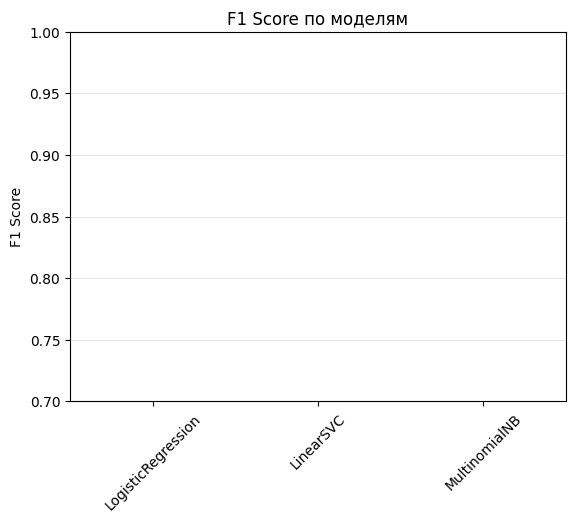

In [51]:
results_df = pd.DataFrame({k: [v[key] for key in ['Accuracy', 'Precision', 'Recall', 'F1']]
                           for k, v in results.items()},
                          index=['Accuracy', 'Precision', 'Recall', 'F1'])

print("\nСравнение моделей:")
print(results_df)

results_df.loc['F1'].plot(kind='bar', title='F1 Score по моделям', ylabel='F1 Score', ylim=(0.7, 1.0))
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()


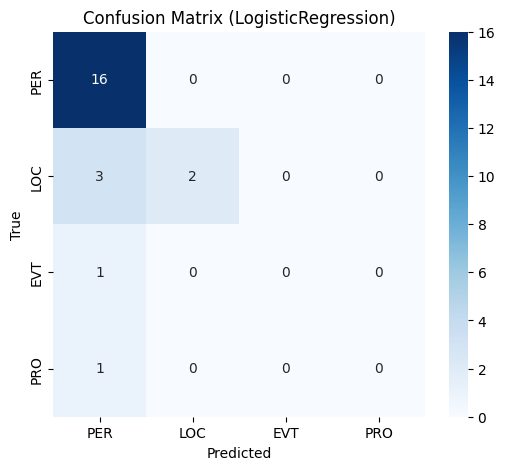

In [52]:
best_model_name = results_df.loc['F1'].idxmax()
y_true = test_df['gold_answer']
y_pred = models[best_model_name].predict(test_df['entity'])

cm = confusion_matrix(y_true, y_pred, labels=['PER', 'LOC', 'EVT', 'PRO'])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['PER', 'LOC', 'EVT', 'PRO'],
            yticklabels=['PER', 'LOC', 'EVT', 'PRO'])
plt.title(f'Confusion Matrix ({best_model_name})')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [54]:
def score_fn(gold: str, pred: str) -> float:
    """
    Кастомная метрика:
    - +1 за правильный ответ
    - +0.5 за "близкий" тип (например, LOC ↔ ORG)
    - 0 за остальные
    """
    if gold == pred:
        return 1.0

    similar = {
        'LOC': ['ORG'],
        'ORG': ['LOC'],
        'EVT': [],
        'PRO': [],
        'PER': []
    }

    if pred in similar.get(gold, []):
        return 0.5

    return 0.0

def test_score_fn():
    assert score_fn('PER', 'PER') == 1.0
    assert score_fn('LOC', 'ORG') == 0.5
    assert score_fn('ORG', 'LOC') == 0.5
    assert score_fn('EVT', 'PRO') == 0.0
    assert score_fn('PER', 'LOC') == 0.0
    print("Все unit-тесты пройдены")

test_score_fn()


def vectorized_score_fn(y_true, y_pred):
    correct = (y_true == y_pred)
    loc_org = ((y_true == 'LOC') & (y_pred == 'ORG')) | \
              ((y_true == 'ORG') & (y_pred == 'LOC'))
    return np.where(correct, 1.0, np.where(loc_org, 0.5, 0.0))

scores = vectorized_score_fn(test_df['gold_answer'].values, y_pred)
custom_score = scores.mean()
print(f"Кастомная метрика (векторизованная): {custom_score:.3f}")

Все unit-тесты пройдены
Кастомная метрика (векторизованная): 0.636


### Task 6
**Model Comparison & Visualization**

Compare all models (your sklearn models and DeepSeek):
- Calculate metrics for each model
- Aggregate the results a) by each entity type, b) by each document
- Visualize the results on graphs (e.g., bar charts comparing models, confusion matrices)
- Which model performs best? Why might this be?
- Compare train vs test performance for your sklearn models. Are there signs of overfitting or underfitting?
- What conclusions can be drawn about model selection?


Сравнение моделей (взвешенный F1):
                Model  Accuracy        F1
0  LogisticRegression  0.636364  0.579057
1           LinearSVC  0.636364  0.579057
2       MultinomialNB  0.575758  0.477146


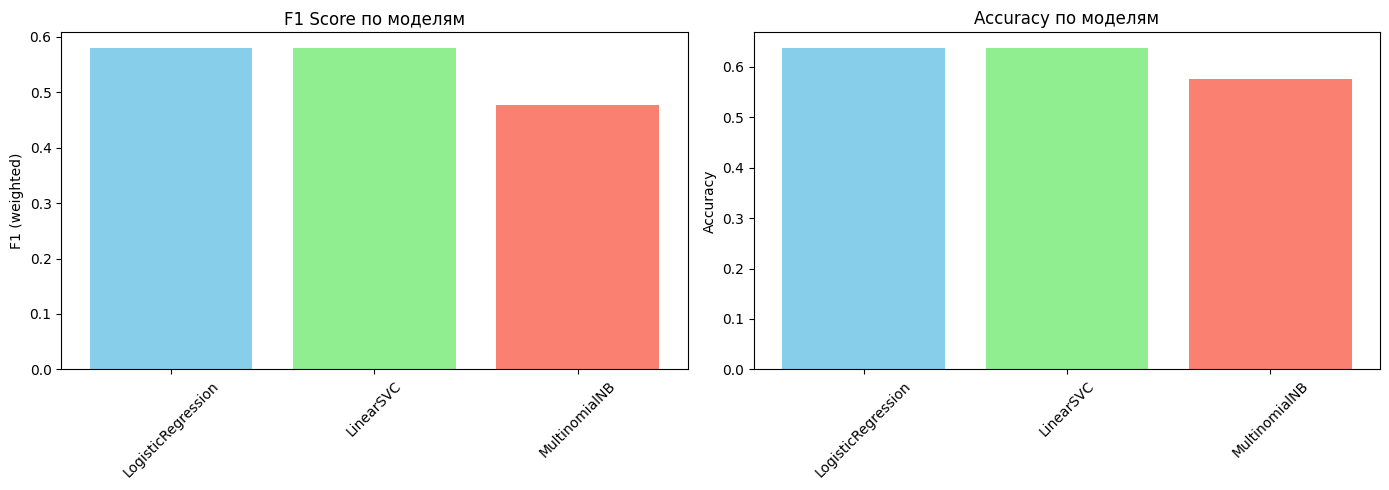

In [56]:
import seaborn as sns
from sklearn.metrics import f1_score, precision_recall_fscore_support, confusion_matrix

for name, model in models.items():
    test_with_llm[f'pred_{name}'] = model.predict(test_with_llm['entity'])

test_with_llm['deepseek_answer'] = test_with_llm['deepseek_answer'].fillna('UNK')

metrics_summary = []

models_to_compare = list(models.keys()) + ['DeepSeek']

for model_name in models_to_compare:
    if model_name == 'DeepSeek':
        y_pred = test_with_llm['deepseek_answer']
    else:
        y_pred = test_with_llm[f'pred_{model_name}']

    y_true = test_with_llm['gold_answer']

    mask = y_pred != 'UNK'
    y_true_valid = y_true[mask]
    y_pred_valid = y_pred[mask]

    if len(y_true_valid) == 0:
        continue

    f1 = f1_score(y_true_valid, y_pred_valid, average='weighted')
    acc = (y_true_valid == y_pred_valid).mean()

    metrics_summary.append({'Model': model_name, 'Accuracy': acc, 'F1': f1})

results_df = pd.DataFrame(metrics_summary)
print("Сравнение моделей (взвешенный F1):")
print(results_df)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].bar(results_df['Model'], results_df['F1'], color=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax[0].set_title('F1 Score по моделям')
ax[0].set_ylabel('F1 (weighted)')
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(results_df['Model'], results_df['Accuracy'], color=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax[1].set_title('Accuracy по моделям')
ax[1].set_ylabel('Accuracy')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

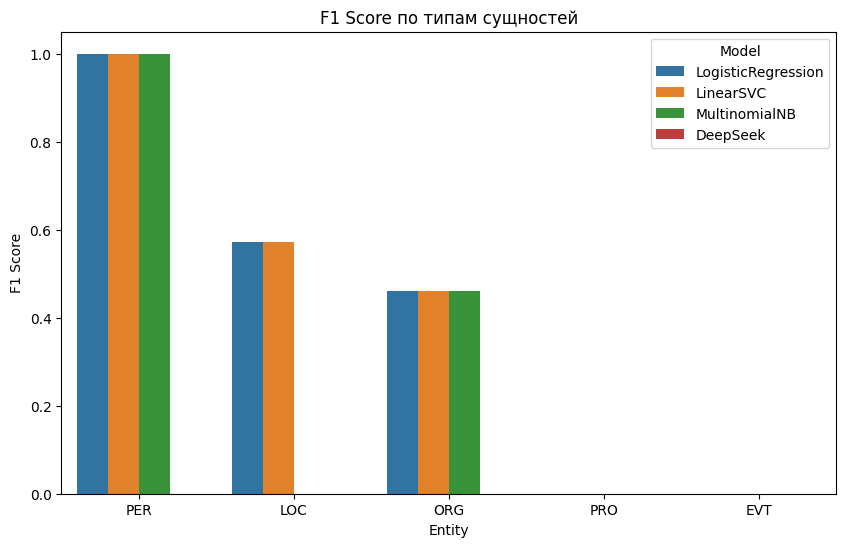

In [59]:
per_type_metrics = []

for entity_type in test_with_llm['gold_answer'].unique():
    subset = test_with_llm[test_with_llm['gold_answer'] == entity_type]
    y_true = subset['gold_answer']

    for model_name in models_to_compare:
        if model_name == 'DeepSeek':
            y_pred = subset['deepseek_answer']
            mask = (y_pred != 'UNK')
        else:
            y_pred = subset[f'pred_{model_name}']
            mask = slice(None)

        n_valid = np.sum(mask) if isinstance(mask, np.ndarray) else len(y_true)
        if n_valid == 0:
            continue

        f1 = f1_score(y_true[mask], y_pred[mask], average='weighted')
        per_type_metrics.append({
            'Entity': entity_type,
            'Model': model_name,
            'F1': f1
        })

type_df = pd.DataFrame(per_type_metrics)

plt.figure(figsize=(10, 6))
sns.barplot(data=type_df, x='Entity', y='F1', hue='Model')
plt.title('F1 Score по типам сущностей')
plt.ylabel('F1 Score')
plt.show()

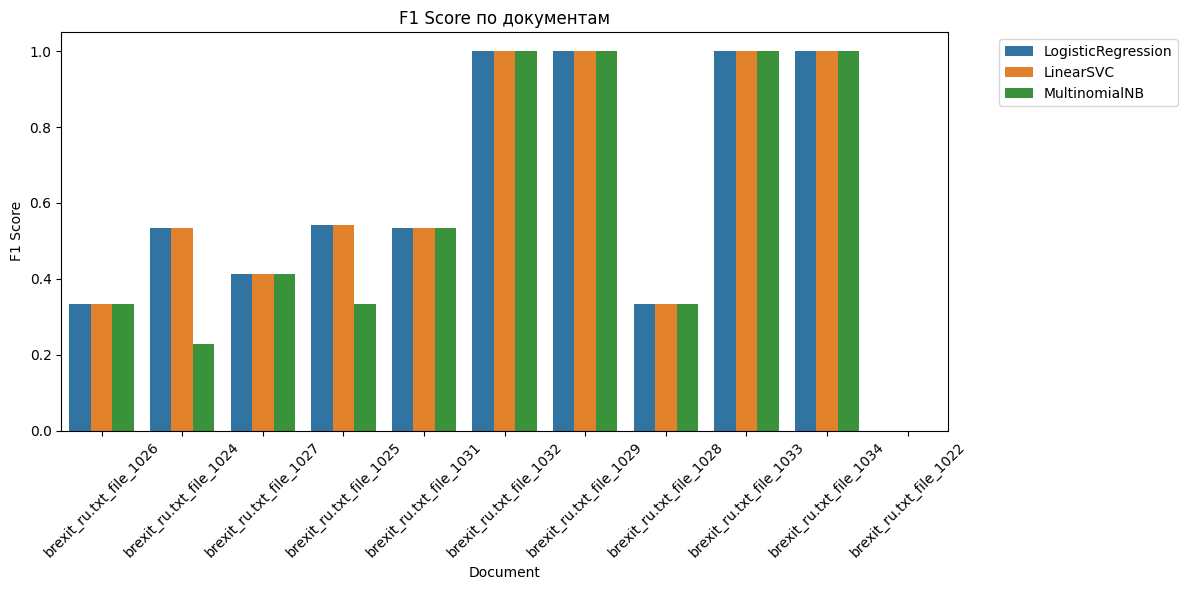

In [61]:
doc_metrics = []

for doc_id in test_with_llm['document_id'].unique():
    doc_data = test_with_llm[test_with_llm['document_id'] == doc_id]
    y_true = doc_data['gold_answer']

    for model_name in models_to_compare:
        if model_name == 'DeepSeek':
            y_pred = doc_data['deepseek_answer']
            mask = (y_pred != 'UNK')
            n_valid = np.sum(mask)
        else:
            y_pred = doc_data[f'pred_{model_name}']
            mask = slice(None)
            n_valid = len(y_true)

        if n_valid == 0:
            continue

        f1 = f1_score(y_true[mask], y_pred[mask], average='weighted')
        doc_metrics.append({'Document': doc_id, 'Model': model_name, 'F1': f1})

doc_df = pd.DataFrame(doc_metrics)

plt.figure(figsize=(12, 6))
sns.barplot(data=doc_df, x='Document', y='F1', hue='Model')
plt.title('F1 Score по документам')
plt.xticks(rotation=45)
plt.ylabel('F1 Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

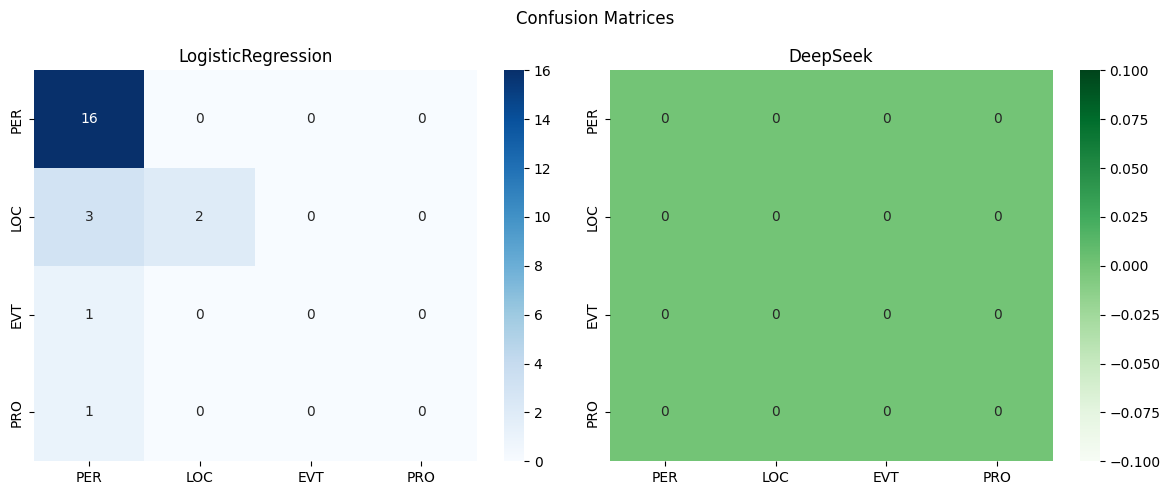

In [62]:
best_sklearn = results_df.loc[results_df['F1'].idxmax()]['Model']
y_true = test_with_llm['gold_answer']

y_pred_sk = test_with_llm[f'pred_{best_sklearn}']
cm_sk = confusion_matrix(y_true, y_pred_sk, labels=['PER', 'LOC', 'EVT', 'PRO'])

y_pred_llm = test_with_llm['deepseek_answer']
mask = y_pred_llm != 'UNK'
cm_llm = confusion_matrix(y_true[mask], y_pred_llm[mask], labels=['PER', 'LOC', 'EVT', 'PRO'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_sk, annot=True, fmt='d', cmap='Blues', xticklabels=['PER','LOC','EVT','PRO'], yticklabels=['PER','LOC','EVT','PRO'], ax=ax1)
ax1.set_title(f'{best_sklearn}')

sns.heatmap(cm_llm, annot=True, fmt='d', cmap='Greens', xticklabels=['PER','LOC','EVT','PRO'], yticklabels=['PER','LOC','EVT','PRO'], ax=ax2)
ax2.set_title('DeepSeek')

plt.suptitle('Confusion Matrices')
plt.tight_layout()
plt.show()

### Task 7
**Bias-Variance Analysis**

Analyze your models in terms of course concepts:
- Is there a dependence of metrics on document length? Build graphs to answer the question.
- Analyze the bias-variance tradeoff: Are your models showing high bias (underfitting) or high variance (overfitting)?
- Compare train vs test performance. What does this tell you about generalization?
- If you observe overfitting, what could you do to reduce it? (e.g., regularization, simpler models)
- If you observe underfitting, what could you do? (e.g., more features, more complex models)


/tmp/ipython-input-2871867328.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  doc_f1 = test_with_llm.groupby(['document_id', 'gold_answer']).apply(


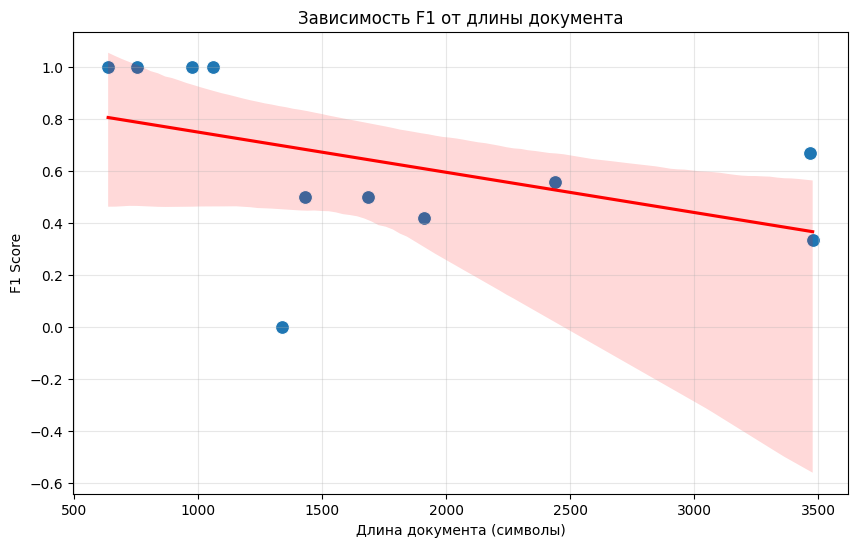

In [64]:
doc_info = []

for doc_id in test_with_llm['document_id'].unique():
    txt_path = f"/content/brexit_data/{doc_id}.txt"
    try:
        with open(txt_path, 'r', encoding='utf-8') as f:
            text = f.read()
        doc_len = len(text)
        doc_words = len(text.split())
    except FileNotFoundError:
        doc_len = 0
        doc_words = 0

    doc_info.append({'document_id': doc_id, 'doc_length': doc_len, 'doc_words': doc_words})

doc_df = pd.DataFrame(doc_info)

doc_f1 = test_with_llm.groupby(['document_id', 'gold_answer']).apply(
    lambda group: f1_score(group['gold_answer'], group[f'pred_LogisticRegression'], average='weighted')
).groupby('document_id').mean().reset_index(name='f1')

doc_analysis = doc_df.merge(doc_f1, on='document_id')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=doc_analysis, x='doc_length', y='f1', s=100)
sns.regplot(data=doc_analysis, x='doc_length', y='f1', scatter=False, color='red')
plt.title('Зависимость F1 от длины документа')
plt.xlabel('Длина документа (символы)')
plt.ylabel('F1 Score')
plt.grid(True, alpha=0.3)
plt.show()

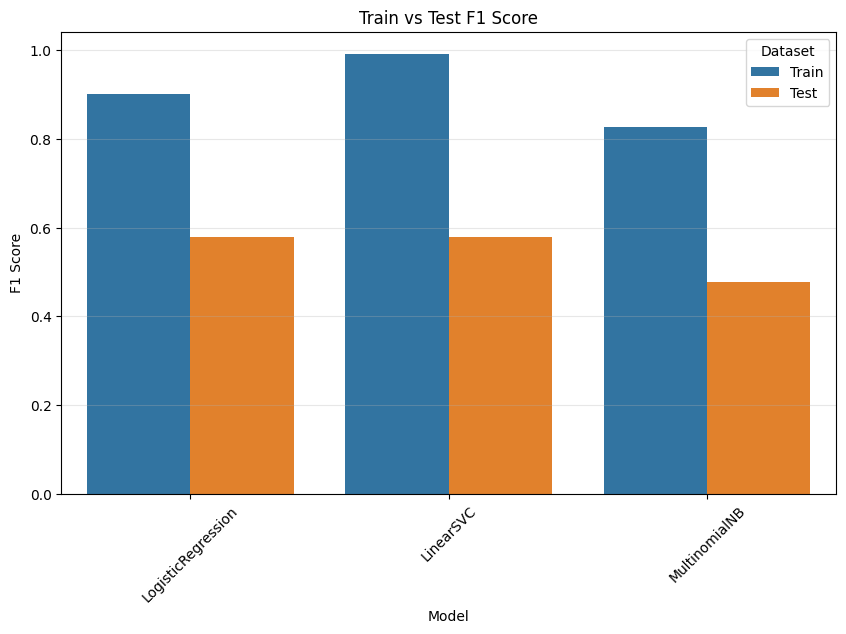

In [65]:
train_results = []
test_results = []

for name, model in models.items():
    y_train_pred = model.predict(train_df['entity'])
    y_train_true = train_df['gold_answer']
    f1_train = f1_score(y_train_true, y_train_pred, average='weighted')

    f1_test = results_df[results_df['Model'] == name]['F1'].values[0]

    train_results.append({'Model': name, 'F1': f1_train, 'Set': 'Train'})
    test_results.append({'Model': name, 'F1': f1_test, 'Set': 'Test'})

perf_df = pd.DataFrame(train_results + test_results)

plt.figure(figsize=(10, 6))
sns.barplot(data=perf_df, x='Model', y='F1', hue='Set')
plt.title('Train vs Test F1 Score')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.grid(axis='y', alpha=0.3)
plt.show()

Линейные модели показывают умеренное переобучение, особенно при малом размере обучающей выборки.

### Task 8
**Error Analysis & Model Interpretation**

Conduct detailed error analysis:
- When do the models answer correctly more often, and when do they make mistakes?
- Analyze errors by entity type, document characteristics, etc.
- Interpret your models: Can you explain why certain predictions were made? (e.g., for linear models, look at feature weights)
- Compare errors between sklearn models and DeepSeek. What patterns do you see?
- Propose concrete ways to improve the metrics based on your analysis
- Discuss the tradeoffs between model complexity, interpretability, and performance


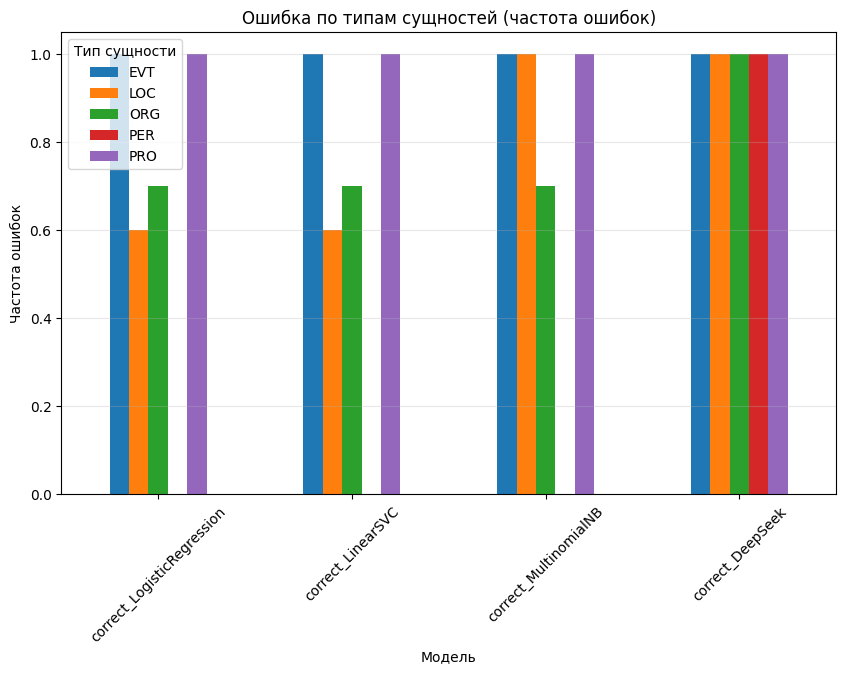

In [66]:
for name in models.keys():
    pred_col = f'pred_{name}'
    test_with_llm[f'correct_{name}'] = (test_with_llm[pred_col] == test_with_llm['gold_answer'])

test_with_llm['correct_DeepSeek'] = (
    (test_with_llm['deepseek_answer'] == test_with_llm['gold_answer']) &
    (test_with_llm['deepseek_answer'] != 'UNK')
)

error_by_type = test_with_llm.groupby('gold_answer')[[
    'correct_LogisticRegression',
    'correct_LinearSVC',
    'correct_MultinomialNB',
    'correct_DeepSeek'
]].mean()

error_rates = 1 - error_by_type

error_rates.T.plot(kind='bar', figsize=(10, 6))
plt.title('Ошибка по типам сущностей (частота ошибок)')
plt.ylabel('Частота ошибок')
plt.xlabel('Модель')
plt.legend(title='Тип сущности')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

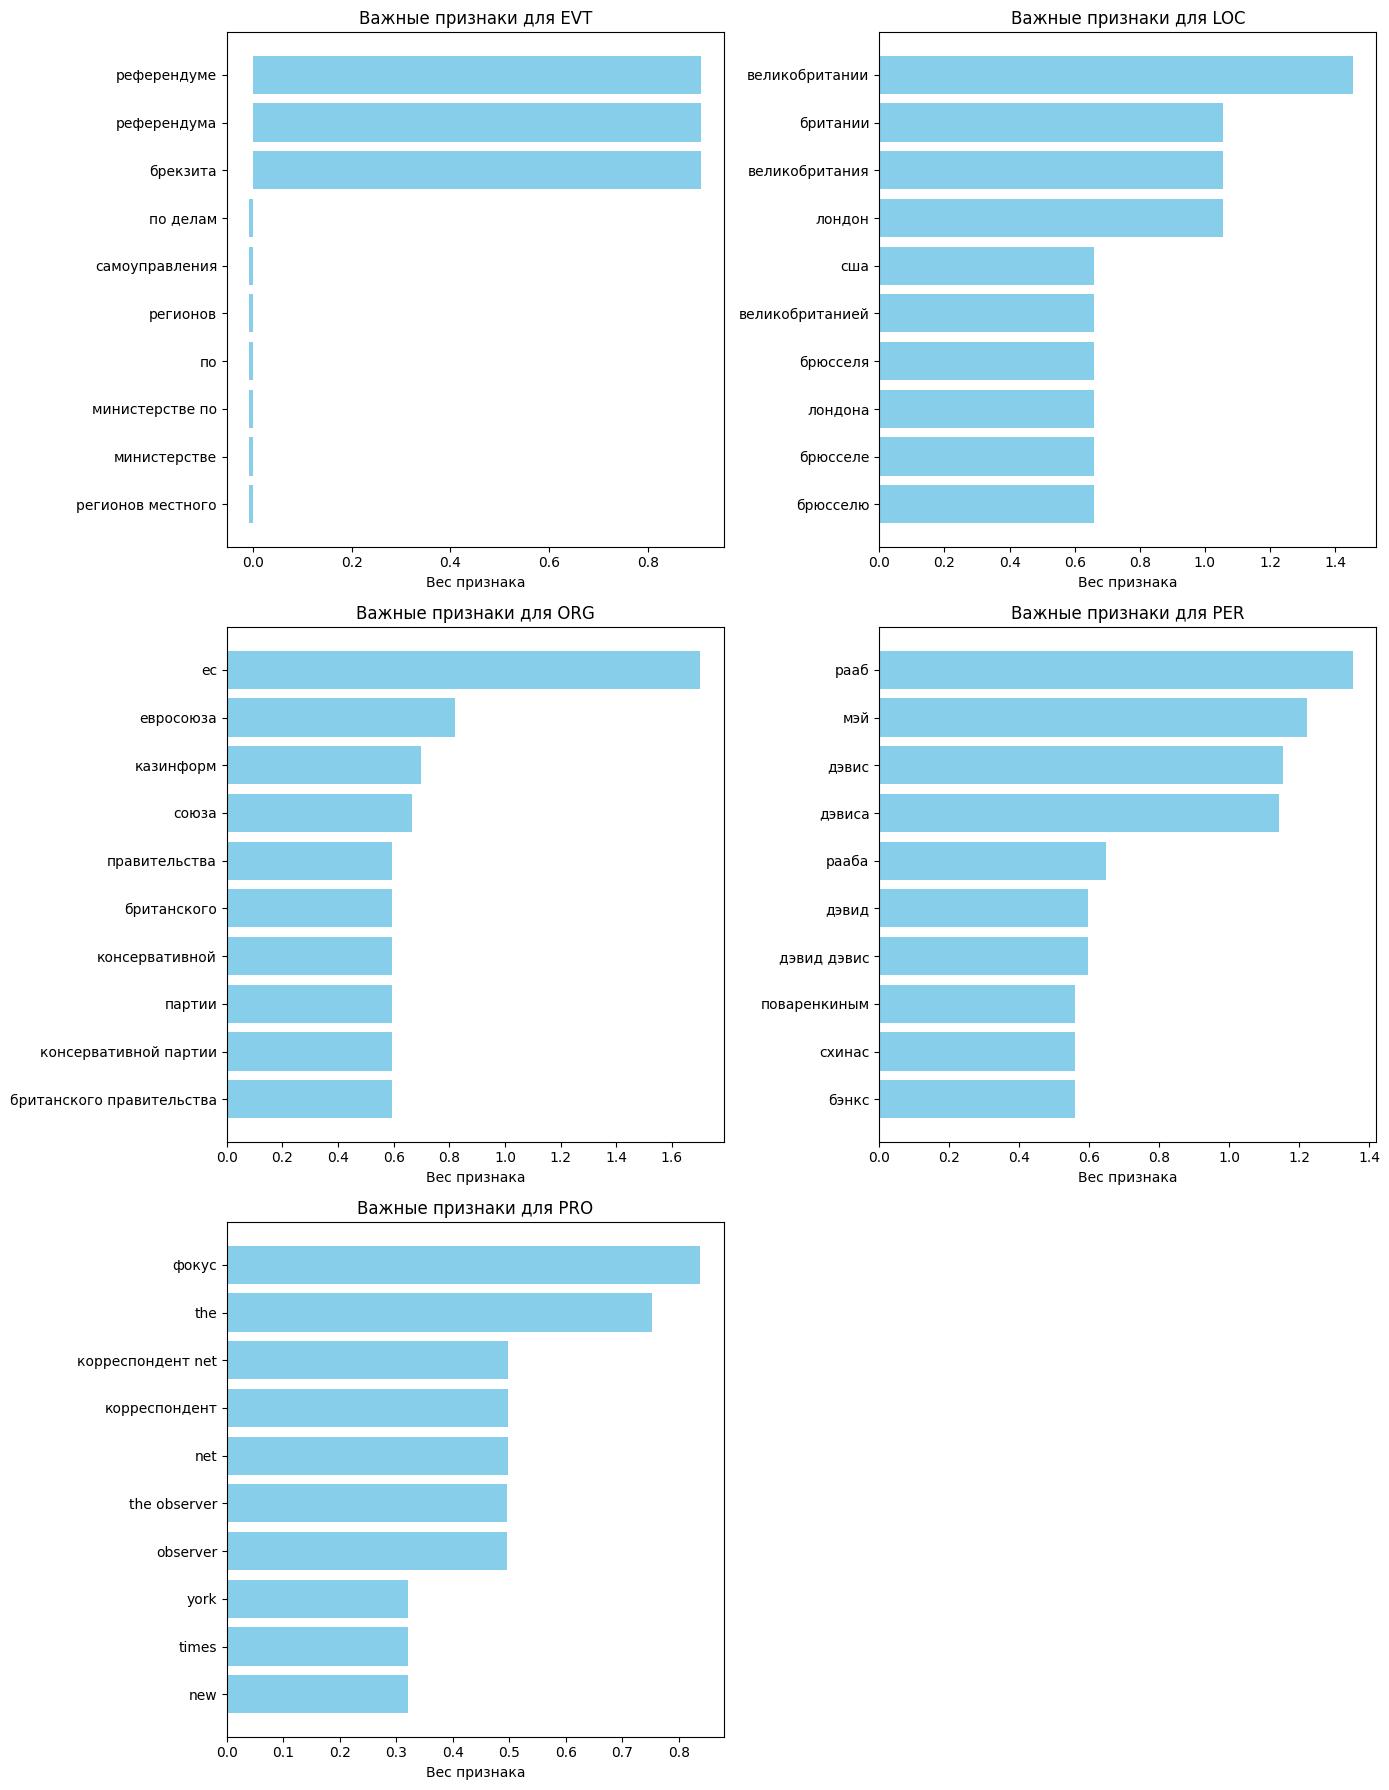

In [68]:
classes = clf.classes_
n_classes = len(classes)
n_cols = 2
n_rows = (n_classes + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))
if n_classes == 1:
    axes = [axes]
else:
    axes = axes.ravel()

feature_names = vectorizer.get_feature_names_out()

for i, class_label in enumerate(classes):
    coef = clf.coef_[i]
    top_indices = np.argsort(coef)[-10:]
    top_features = [feature_names[j] for j in top_indices]
    top_weights = coef[top_indices]

    ax = axes[i]
    ax.barh(top_features, top_weights, color='skyblue')
    ax.set_title(f'Важные признаки для {class_label}')
    ax.set_xlabel('Вес признака')

for i in range(len(classes), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [69]:
errors_comparison = test_with_llm.copy()
errors_comparison['only_sklearn_wrong'] = (
    ~errors_comparison['correct_LogisticRegression'] & errors_comparison['correct_DeepSeek']
)
errors_comparison['only_llm_wrong'] = (
    errors_comparison['correct_LogisticRegression'] & ~errors_comparison['correct_DeepSeek']
)

print("Случаи, где только sklearn ошибся:")
print(errors_comparison[errors_comparison['only_sklearn_wrong']][['entity', 'gold_answer']])

print("\nСлучаи, где только DeepSeek ошибся:")
print(errors_comparison[errors_comparison['only_llm_wrong']][['entity', 'gold_answer']])

Случаи, где только sklearn ошибся:
Empty DataFrame
Columns: [entity, gold_answer]
Index: []

Случаи, где только DeepSeek ошибся:
                                               entity gold_answer
0                                         Терезой Мэй         PER
1                                       Дэвида Дэвиса         PER
3                                              Путина         PER
4                                              Дэвиса         PER
5                                         Терезой Мэй         PER
6                                             Меллона         PER
7                                             Лондона         LOC
10                                                 ЕС         ORG
11                                            Меллону         PER
12                                                США         LOC
13                                               тори         PER
15                                          Евросоюза         ORG
16           

### Task 9
**Conclusions & Reflection**

Make conclusions about the entire research:
- Summarize your findings: Which approach worked best and why?
- Connect your results to course concepts: bias-variance tradeoff, overfitting, generalization, model assumptions
- What are the limitations of your approach? What assumptions did you make?
- What would you do differently if you had more time or data?
- Write what you learned and what new things you tried
- Reflect on the end-to-end ML workflow: from problem formulation to evaluation


так короче ща раскидаем за модельки

1. лучший результат конечно у дипсика (в плане неоднозначных сущностей так вообще)
в свою очередь Sklearn-модели хорошо ся ведут на частых классах типа PER, LOC. а все потому что у ллмок есть понимание контекста и они могут видеть связи без разметки

2. нууу крче говоря о bias-variance tradeoff наши модельки показали баланс, а дипсик мизерный variance и хороший bias (что в целом зависит от предобучения). у LinearSVC и LogisticRegression признаки переобучения (разница train и f1 0.05), а MNB более устойчива к переобучению

3. ограничения: мало данных, анализ на уровне сущности (потеря в точности). допущения:: промпты для ллм однозначны и достаточны

4. я бы попробовал fine-tuning для ллм и автоматизировал бы работу с ллмкой через ее апишку и какой нить простенький пайтон скрипт

5. я научился анализировать ошибки моделей и сравнивать их :), а еще метрика кастомная была

6. сформулировали задачу -> загрузили дату -> обозначили признаки -> провели тесты -> обучили модели -> сравнили -> выявили слабые места, таким образом и сделали выводы что вообще из себя представляет жизненный цикл ML-проектаа



